In [1]:
from fastai.vision import *

In [4]:
folder='Real Trump'
path=Path('data/Donald Trump audio spectrum')
dest=path/folder
dest.mkdir(parents=True,exist_ok=True)

In [5]:
folder='Impersonation'
path=Path('data/Donald Trump audio spectrum')
dest=path/folder
dest.mkdir(parents=True,exist_ok=True)

In [6]:
path.ls()

[PosixPath('data/Donald Trump audio spectrum/Real Trump'),
 PosixPath('data/Donald Trump audio spectrum/Impersonation'),
 PosixPath('data/Donald Trump audio spectrum/.ipynb_checkpoints')]

In [7]:
classes=['Real Trump','Impersonation']

In [9]:
for c in classes:
    print(c)
    verify_images(path/c,delete=True,max_size=500)

In [18]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=493, num_workers=4).normalize(imagenet_stats)

In [19]:
data.classes

['Impersonation', 'Real Trump']

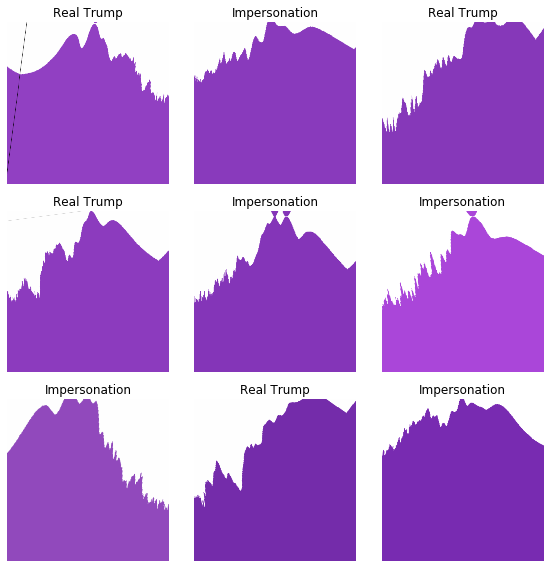

In [20]:
data.show_batch(rows=3,figsize=(8,8))

In [21]:
data.classes,data.c,len(data.train_ds),len(data.valid_ds)

(['Impersonation', 'Real Trump'], 2, 160, 40)

In [23]:
#Train model
learn=cnn_learner(data,models.resnet34,metrics=error_rate)

In [25]:
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,error_rate,time
0,0.899270,2.256273,0.500000,00:04
1,0.926664,2.228284,0.500000,00:04
2,0.857395,1.831222,0.475000,00:04
3,0.896751,1.431980,0.425000,00:04
4,0.816172,1.313013,0.400000,00:04
5,0.800034,1.917434,0.450000,00:04
6,0.769356,2.913261,0.450000,00:04
7,0.742218,2.534760,0.475000,00:04
8,0.726983,1.774003,0.450000,00:04
9,0.708341,0.809120,0.325000,00:04


In [26]:
learn.save('stage-1')

In [27]:
learn.unfreeze()

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


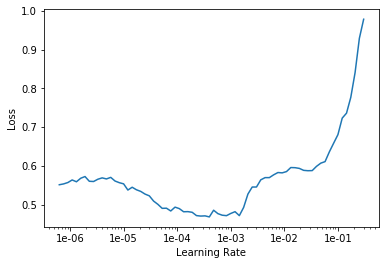

In [29]:
learn.recorder.plot()

In [32]:
learn.fit_one_cycle(20,max_lr=slice(1e-04,3e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.297846,0.881435,0.275000,00:05
1,0.261957,0.686133,0.200000,00:05
2,0.262499,0.470016,0.175000,00:05
3,0.251475,0.408642,0.125000,00:05
4,0.241350,0.366880,0.100000,00:05
5,0.209558,1.514531,0.325000,00:05
6,0.225233,1.232548,0.275000,00:05
7,0.207610,0.607354,0.175000,00:05
8,0.204024,0.403316,0.100000,00:05
9,0.194693,0.275319,0.075000,00:05


In [ ]:
learn.save('stage-2')

In [36]:
learn.fit_one_cycle(10,max_lr=slice(3e-04,1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.100379,0.215030,0.100000,00:05
1,0.094556,0.218635,0.075000,00:05
2,0.094686,0.267094,0.100000,00:05
3,0.087971,0.466711,0.175000,00:05
4,0.097311,0.417551,0.125000,00:05
5,0.087790,0.358391,0.125000,00:05
6,0.090529,0.307561,0.100000,00:05
7,0.081758,0.281046,0.075000,00:05
8,0.074747,0.269235,0.075000,00:05
9,0.069357,0.263100,0.075000,00:05


In [37]:
learn.save('stage-3')

In [38]:
#interpretation
learn.load('stage-3')

Learner(data=ImageDataBunch;

Train: LabelList (160 items)
x: ImageList
Image (3, 493, 493),Image (3, 493, 493),Image (3, 493, 493),Image (3, 493, 493),Image (3, 493, 493)
y: CategoryList
Real Trump,Real Trump,Real Trump,Real Trump,Real Trump
Path: data/Donald Trump audio spectrum;

Valid: LabelList (40 items)
x: ImageList
Image (3, 493, 493),Image (3, 493, 493),Image (3, 493, 493),Image (3, 493, 493),Image (3, 493, 493)
y: CategoryList
Impersonation,Real Trump,Real Trump,Impersonation,Impersonation
Path: data/Donald Trump audio spectrum;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding

In [39]:
interp=ClassificationInterpretation.from_learner(learn)

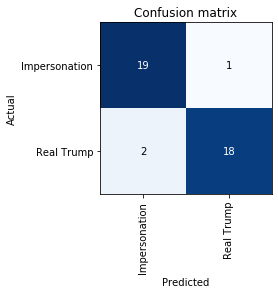

In [40]:
interp.plot_confusion_matrix()